In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_df=pd.read_csv('home/train.csv')
train_df.head(10)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [2]:
# grade 컬럼 값이 유일한게 몇개가 있는지 출력?

In [3]:
for col in train_df:
    print(col,"->",train_df[col].nunique(),"가지")

id -> 15035 가지
date -> 365 가지
price -> 3263 가지
bedrooms -> 11 가지
bathrooms -> 29 가지
sqft_living -> 863 가지
sqft_lot -> 7678 가지
floors -> 6 가지
waterfront -> 2 가지
view -> 5 가지
condition -> 5 가지
grade -> 12 가지
sqft_above -> 789 가지
sqft_basement -> 271 가지
yr_built -> 116 가지
yr_renovated -> 65 가지
zipcode -> 70 가지
lat -> 4692 가지
long -> 716 가지
sqft_living15 -> 682 가지
sqft_lot15 -> 6958 가지


<Figure size 1008x720 with 0 Axes>

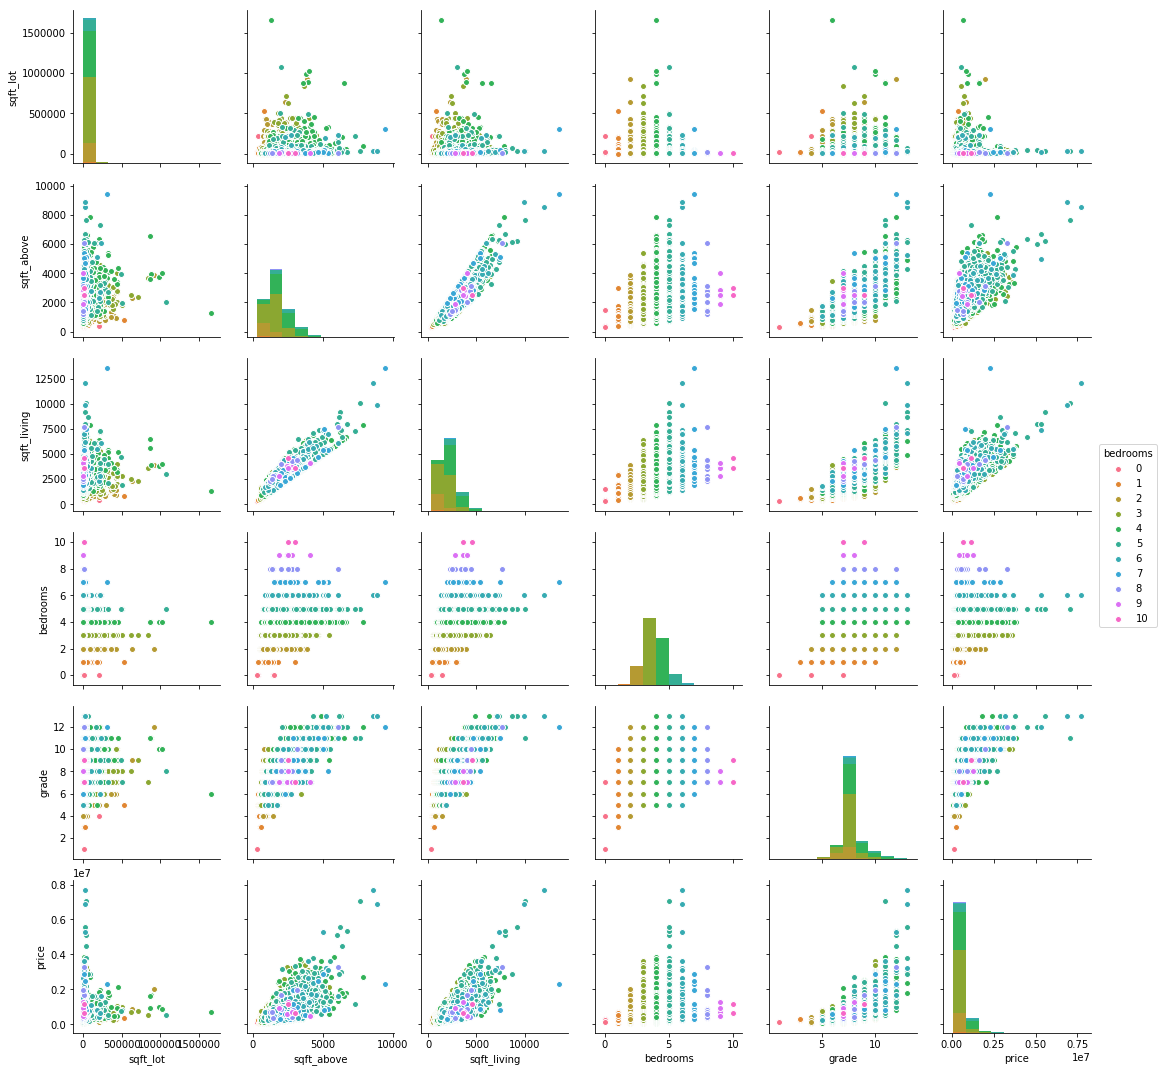

In [4]:
#시각화: 가격, 등급, 침실개수, 건평, 대지평
cols=['sqft_lot', 'sqft_above', 'sqft_living', 'bedrooms', 'grade', 'price']
plt.figure(figsize=(14,10))
sns.pairplot(train_df[cols], hue='bedrooms')

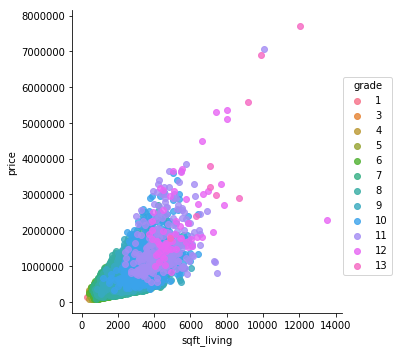

In [5]:
sns.lmplot(data=train_df, hue='grade', x='sqft_living', y='price', fit_reg=False)

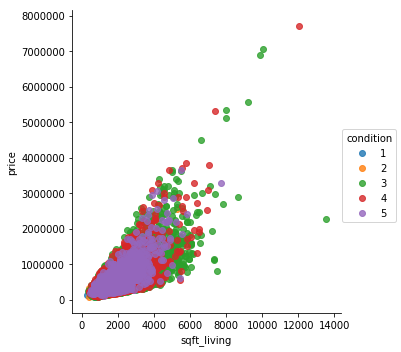

In [6]:
sns.lmplot(data=train_df, hue='condition', x='sqft_living', y='price', fit_reg=False)

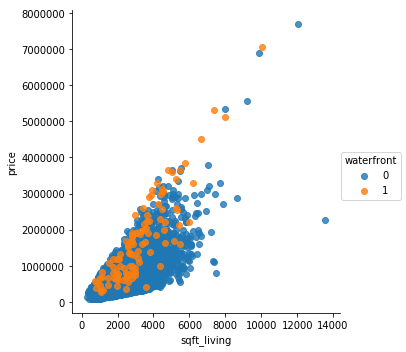

In [7]:
sns.lmplot(data=train_df, hue='waterfront', x='sqft_living', y='price', fit_reg=False)

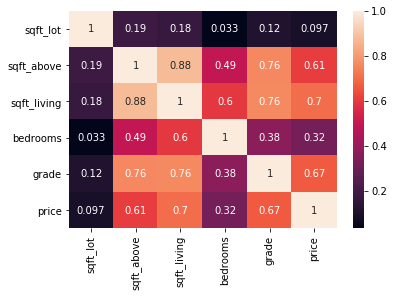

In [8]:
train_df[cols].corr()
#sns.lmplot(data=train_df[cols].corr())
sns.heatmap(data=train_df[cols].corr(), annot=True)

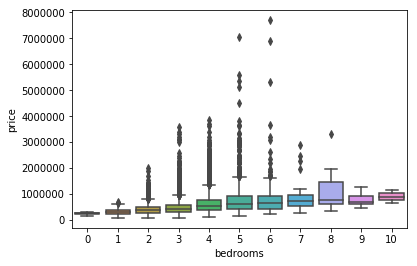

In [9]:
# 방의 개수에 따른 주택 가격을 boxplot
sns.boxplot(data=train_df, x="bedrooms", y='price')

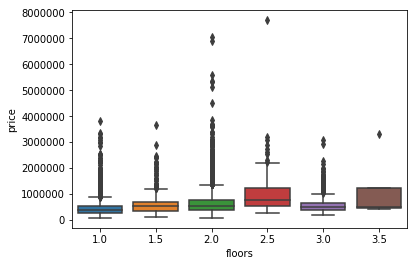

In [10]:
sns.boxplot(data=train_df, x="floors", y='price')

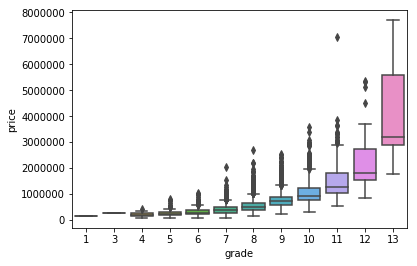

In [11]:
sns.boxplot(data=train_df, x="grade", y='price')

[Text(0.5, 0, 'sqft_living'), Text(0.5, 0, 'bedrooms'), Text(0.5, 0, 'floors')]

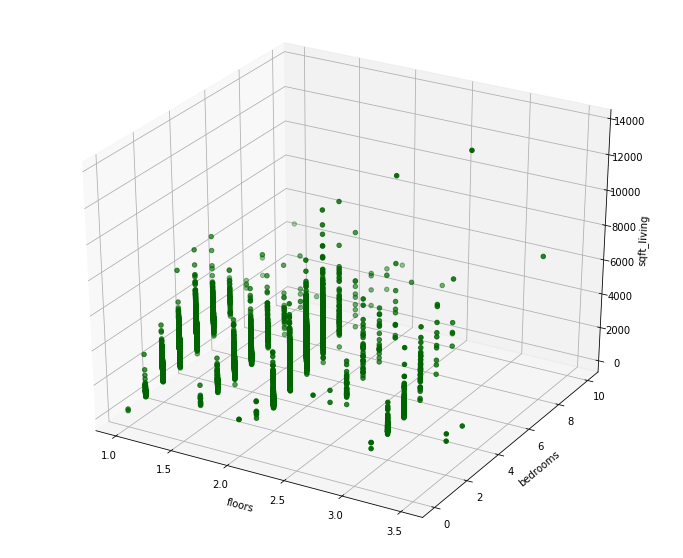

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.scatter(train_df['floors'],train_df['bedrooms'],train_df['sqft_living'], c='darkgreen')
ax.set(xlabel='floors',ylabel='bedrooms', zlabel='sqft_living')

In [13]:
train_df=train_df.drop(['id','date'], axis=1)
train_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
train_df_part1, train_df_part2=train_test_split(train_df, train_size=0.7, random_state=42)

C:\Users\B-7\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [21]:
print(train_df.shape)
print(train_df_part1.shape)
print(train_df_part2.shape)

(15035, 19)
(10524, 19)
(4511, 19)


In [22]:
train_df_part1
# train_df_part1 데이터를 활용하여 텐서플로우 상에서 선형회귀모델 생성(입력: sqft_living, 출력: price)
# train_df_part2 데이터를 활용하여 테스트(입력: sqft_living, 예측값과 실제값 비교)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8177,438750.0,3,1.75,1610,6480,1.0,0,0,4,7,1610,0,1947,0,98125,47.7137,-122.307,1230,8040
14414,265000.0,2,1.50,1084,3427,2.0,0,0,3,7,1084,0,1976,0,98125,47.7117,-122.326,1084,6250
14146,356250.0,3,2.50,2060,5115,2.0,0,0,3,9,2060,0,2014,0,98092,47.3261,-122.163,2648,4500
1345,820000.0,5,2.75,2830,6137,2.0,0,0,3,9,2830,0,2010,0,98074,47.5932,-122.058,3170,6285
1444,276900.0,2,1.00,1350,10096,1.0,0,2,4,7,1350,0,1952,0,98045,47.4967,-121.778,1280,10095
10934,500000.0,4,2.00,1980,4500,2.0,0,0,4,7,1980,0,1910,0,98107,47.6728,-122.379,1550,2541
3499,499900.0,4,2.25,2360,7650,1.0,0,0,3,8,1640,720,1963,0,98155,47.7500,-122.292,2320,11060
7883,279000.0,3,1.00,1010,7903,1.0,0,0,3,6,1010,0,1948,0,98155,47.7660,-122.320,1010,7903
5090,123000.0,2,1.00,1050,6600,1.5,0,0,3,6,1050,0,1964,0,98168,47.4828,-122.324,1330,6600
7502,612500.0,4,2.00,1690,35346,1.0,0,0,3,7,1690,0,1967,0,98008,47.6149,-122.124,2050,37846


In [25]:
model=LinearRegression()
model.fit(train_df_part1[['sqft_living']],train_df_part1[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
predicted=model.predict(train_df_part2[['sqft_living']])
predicted

array([[ 367157.06722055],
       [ 494289.51360297],
       [ 346931.45075062],
       ...,
       [1485344.72062951],
       [ 552076.98923134],
       [ 893023.09543872]])

In [33]:
#예측값과 실제값 사이에서 점수(score)계산(결정계수, R square)
#0<= R2 <=1 => 1에 가까울수록 예측값과 실제값이 거의 비슷(설명력이 크다)
# => 1에 가까울수록 설명력이 작다
#R2 = (Q-Qe) / Q
#Q : 전체 데이터이 편차들을 제곱해서 합한 값
#Qe : 전체 데이터의 잔차들을 제곱해서 합한 값

score=model.score(train_df_part2[['sqft_living']], train_df_part2[['price']])
print(format(score, '.3f'))

#트레이닝 데이터(train_df_part1)로 만든 선형회귀모델(model)에 
#테스트 데이터(train_df_part2)의 sqft_living을 입력으로 했을때 예측되는 값과
#price 사이에서 결정계수(R square)를 구한다. ( 0<=R<=1 )

#하우스 가격 = w * sqft_living + b
#선형모델직선의 기울기(w)와 상수(b)를 출력


0.469


In [34]:
print("Intercept: {}".format(model.intercept_))
print("Coefficient: {}".format(model.coef_))
# 가설함수=288 * sqft_living-60470

Intercept: [-60470.25242938]
Coefficient: [[288.93737814]]


In [36]:
model.predict(2000)[0][0] #2천평인 경우 집의 가격? 517404
# train_df_part2[['sqft_living']]

517404.50385431363

In [40]:
#면적, 방의개수, 화장실개수
features=['sqft_living', 'bedrooms', 'bathrooms']
#multi-variables(multiple) linear regression
model2=LinearRegression()
model2.fit(train_df_part1[features], train_df_part1['price'])
score=model2.score(train_df_part2[features], train_df_part2['price'])
print(score)

0.4832220701273626


In [41]:
features=['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors']
model3=LinearRegression()
model3.fit(train_df_part1[features], train_df_part1['price'])
score=model3.score(train_df_part2[features], train_df_part2['price'])
print(score)

0.4840569333415088


In [42]:
features=['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'grade', 'yr_built']
model4=LinearRegression()
model4.fit(train_df_part1[features], train_df_part1['price'])
score=model4.score(train_df_part2[features], train_df_part2['price'])
print(score)

0.6432113818780848


In [43]:
#0.65가 나왔는데....오늘 여러분의 목표는 0.7이상의 score
# 1) 파생 변수 고려? 입력 변수로부터 특정 연산을 수행하여 생성한 변수
# 2) 아웃라이어 제거?
# 3) 값을 구간으로 나눠보는건 어떨까?
# 4) 정규화(표준화)?
# 5) 원핫 인코딩 사용?
# 여기까지는 배운 내용
# 6) 딥러닝 사용?

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
dtModel=DecisionTreeRegressor(random_state=42)
dtModel.fit(train_df_part1[features], train_df_part1['price'])
score=dtModel.score(train_df_part2[features], train_df_part2['price'])
print(score)
predicted=dtModel.predict(train_df_part2[features])
print(predicted)

0.4333352412511555
[ 295000.  390000.  608000. ... 3000000. 1050000.  664000.]


In [54]:
for i in range(3,40,2):
    knnModel=KNeighborsRegressor(n_neighbors=i)
    knnModel.fit(train_df_part1[features], train_df_part1['price'])
    score=knnModel.score(train_df_part2[features], train_df_part2['price'])
    print("k값이", i, "인 경우 R2 점수:", score)

k값이 3 인 경우 R2 점수: 0.43510176294456127
k값이 5 인 경우 R2 점수: 0.47385417480094405
k값이 7 인 경우 R2 점수: 0.48229319208017396
k값이 9 인 경우 R2 점수: 0.49045330505932994
k값이 11 인 경우 R2 점수: 0.49415556303815233
k값이 13 인 경우 R2 점수: 0.49098517013551857
k값이 15 인 경우 R2 점수: 0.48871061690825435
k값이 17 인 경우 R2 점수: 0.48829395843492507
k값이 19 인 경우 R2 점수: 0.48705648131871837
k값이 21 인 경우 R2 점수: 0.48789287517957014
k값이 23 인 경우 R2 점수: 0.48497155225419897
k값이 25 인 경우 R2 점수: 0.4859771507946346
k값이 27 인 경우 R2 점수: 0.484291028008905
k값이 29 인 경우 R2 점수: 0.4819790497809726
k값이 31 인 경우 R2 점수: 0.4822078137833795
k값이 33 인 경우 R2 점수: 0.48108707483399094
k값이 35 인 경우 R2 점수: 0.4794219259863458
k값이 37 인 경우 R2 점수: 0.4787040267980457
k값이 39 인 경우 R2 점수: 0.47747195770971007


In [61]:
for i in range(40,55,2):
    rfModel=RandomForestRegressor(random_state=42, n_estimators=i)
    rfModel.fit(train_df_part1[features], train_df_part1['price'])
    score=rfModel.score(train_df_part2[features], train_df_part2['price'])
    print(score)

0.6744869774215474
0.6748783755573617
0.6748106711907713
0.6753224766470394
0.6767373023703738
0.6781579124374477
0.6778763650356494
0.6793699596135211


In [62]:
import tensorflow as tf
import numpy as np

C:\Users\B-7\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [68]:
xy=np.loadtxt("diabetes.csv", delimiter=",")
xdata=xy[: , 0:-1]
ydata=xy[: , [-1]]
print(xdata.shape, ydata.shape)

(759, 8) (759, 1)


In [77]:
x=tf.placeholder(tf.float32, shape=[None,8])
y=tf.placeholder(tf.float32, shape=[None,1])

#xw+b
#[None,8] * [8,]
w=tf.Variable(tf.random_normal([8,1]))
b=tf.Variable(tf.random_normal([1]))

hf=tf.sigmoid(tf.matmul(x,w)+b)

cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

predicted=tf.cast(hf>0.5, dtype=tf.float32 )
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(10001):
    _, cv=sess.run([train, cost], feed_dict={x:xdata, y:ydata})
#     if step%200 ==0:
#         print(step, cv)

# cost=tf.reduce_mean(tf.squar(hf-y)) linear regression에서 사용되는 cost함수

pv, av=sess.run([predicted, accuracy], feed_dict={x:xdata, y:ydata})
print("예측값:", pv, "정확도:", av)

예측값: [[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]

['One-way', ',', 'or', 'round-triap', '?']

['Round', '-', 'trip', 'please', '.']